# Creating gloss vector from nltk corpus (brown)

Experiment to check out on smaller scale

In [140]:
import numpy as np
import scipy
from scipy.sparse import bsr_matrix
import nltk.corpus
from nltk.tokenize import RegexpTokenizer
import re
import matplotlib.pyplot as plt

In [15]:
# Position surrounding word
num_pos = 4
keyword = "serve"

In [3]:
word_list = nltk.corpus.brown.words()
filtered_words = [word for word in word_list if word not in nltk.corpus.stopwords.words('english')]

In [4]:
print(len(filtered_words))

727501


In [22]:
indices = [i for i, x in enumerate(filtered_words) if x == keyword]
print(len(indices))

103


In [5]:
tokenizer = RegexpTokenizer(r'\w+')
just_words = tokenizer.tokenize(" ".join(word_list))
just_words = [x.lower() for x in just_words]
unique_words = list(set(just_words))
print(unique_words)

['carrot', 'grove', 'revealed', 'chambers', 'saluted', 'brieff', 'sadly', 'ruthlessly', 'nothing', 'sensibility', 'sunset', 'simplicities', 'redwoods', 'lithium', 'exaggerations', 'vrai', 'compendium', 'homemade', 'olerichs', 'skindiving', 'substituting', 'club', 'reconstruction', 'press', 'parental', 'jocular', 'koehler', 'cannery', 'energetic', 'involuntary', 'entertainment', 'mussolinis', 'paraphernalia', 'infestation', 'canute', 'airdrops', 'jocularly', 'riegger', 'announcements', 'prolific', 'technicians', 'proprietor', 'boulder', 'hughes', 'disastrous', 'assembly', 'bureaucracies', 'loin', 'urinary', 'exceed', 'challenge', 'puffy', 'pubs', 'effluent', 'intimidation', 'sober', 'doubloon', 'gaging', 'substances', 'canandaigua', 'difficulty', 'formalized', 'streak', 'yoga', 'requiring', 'drain', 'derby', 'streetcar', 'liberties', 'operates', 'quarterback', 'teardrop', 'grounded', 'curb', 'openly', 'grip', 'unvarying', 'tantrums', 'malignancy', 'bernburg', 'clothes', 'electrocardiogr

In [6]:
print(len(unique_words))

42432


In [7]:
filtered_words_cp = filtered_words.copy()
print(filtered_words_cp[360:370])
print(filtered_words_cp[43340:43350])
index = filtered_words_cp.index(keyword)
print(index)
filtered_words_cp.pop(index)
index = filtered_words_cp.index(keyword)
print(index)

['committee', '.', '``', 'These', 'actions', 'serve', 'protect', 'fact', 'effect', "court's"]
["SMU's", 'food', 'wrangler', ',', 'buys', 'enough', 'groceries', 'serve', '32,000', 'meals']
365
43346


In [8]:
gloss_vector = np.zeros(len(unique_words))

In [16]:
indices = [i for i, x in enumerate(filtered_words) if x == keyword]
words_around = []
for i in indices:
    words_around.extend(filtered_words[i - num_pos : i])
    words_around.extend(filtered_words[i + 1 : i + num_pos + 1])

print(words_around)

['.', '``', 'These', 'actions', 'protect', 'fact', 'effect', "court's", ',', 'buys', 'enough', 'groceries', '32,000', 'meals', 'week', '.', 'like', 'high', 'schoolers', 'wife', 'advisors', 'First', 'Presbyterian', 'Church', '.', 'Regional', 'representatives', 'appointed', 'section', 'country', 'include', 'Frank', ',', 'oldest', 'man', 'ever', 'Senate', '.', 'The', 'famous', 'libraries', 'two', 'counties', 'combine', 'large', ',', 'sparsely', 'populated', 'resources', 'rapidly', 'growing', 'territory', '.', 'Both', 'types', ',', 'Italian', 'airmen', 'went', 'Congo', 'cause', 'peace', 'United', 'Nations', 'state', 'yield', 'sovereignty', 'agencies', '.', 'The', 'people', ',', 'Cunard', 'Eagle', 'Airways', 'applied', 'New', 'York', '.', 'The', 'Christians', 'Jews', ',', 'asked', 'committee', 'fund', '.', 'It', 'reference', 'resolution', 'commend', 'citizens', 'judges', 'election', 'properly', 'discharge', 'learned', 'manipulate', 'present', 'stereotype', 'ends', '.', 'The', 'objective', '

In [17]:
for word in words_around:
    if word in unique_words:
        index = unique_words.index(word)
        gloss_vector[index] += 1
        
print(gloss_vector)

[0. 0. 0. ... 0. 0. 0.]


In [18]:
indices = [i for i, x in enumerate(gloss_vector) if x > 0]
for i in indices:
    print(unique_words[i], ": ", gloss_vector[i])

coolers :  2.0
judges :  2.0
existing :  3.0
famous :  1.0
doubt :  1.0
structural :  2.0
models :  2.0
since :  2.0
discharge :  1.0
contract :  1.0
fund :  2.0
commend :  2.0
sons :  2.0
yield :  1.0
college :  2.0
procedures :  1.0
installed :  2.0
school :  2.0
highways :  1.0
responses :  1.0
merger :  1.0
type :  4.0
restaurant :  2.0
anchovy :  1.0
listing :  1.0
wish :  2.0
beans :  1.0
cracked :  2.0
performances :  2.0
traditional :  1.0
clarified :  2.0
ease :  1.0
intentions :  2.0
feed :  2.0
constituency :  3.0
clerk :  2.0
guide :  4.0
religion :  2.0
lights :  2.0
motioned :  2.0
returned :  1.0
floor :  2.0
best :  8.0
prices :  1.0
stretched :  1.0
emotion :  1.0
advice :  1.0
less :  2.0
another :  2.0
better :  2.0
based :  1.0
loss :  1.0
give :  1.0
show :  2.0
indeed :  2.0
exercised :  1.0
liberty :  1.0
measures :  2.0
university :  2.0
make :  1.0
hast :  2.0
source :  1.0
truly :  3.0
earlier :  1.0
sense :  2.0
local :  1.0
spokesmen :  2.0
companies :  1.0


In [24]:
print(gloss_vector[unique_words.index("tennis")])
print(gloss_vector[unique_words.index("purpose")])
print(gloss_vector[unique_words.index("bird")])
print(gloss_vector[unique_words.index("dinner")])
print(gloss_vector[unique_words.index("lunch")])
print(gloss_vector[unique_words.index("breakfast")])
print(gloss_vector[unique_words.index("food")])
print(gloss_vector[unique_words.index("waiter")])
print(gloss_vector[unique_words.index("restaurant")])

0.0
8.0
0.0
2.0
0.0
0.0
0.0
0.0
2.0


In [49]:
from nltk.corpus import wordnet as wn
c = 0
for ss in wn.all_synsets():
    ss = wn.synset("dog")
    print(ss)
    #print(ss.attributes())
    #print(ss.also_sees())
    print(ss.causes())
    #print(ss.closure())
    #print(ss.common_hypernyms())
    print(ss.definition())
    print(ss.entailments())
    print(ss.examples())
    print(ss.frame_ids())
    print(ss.hypernym_distances())
    print(ss.hypernym_paths())
    print(ss.hypernyms())
    print(ss.hyponyms())
    print(ss.instance_hypernyms())
    print(ss.instance_hyponyms())
    #print(ss.jcn_similarity())
    #print(ss.lch_similarity())
    print(ss.lemma_names())
    print(ss.lemmas())
    print(ss.lexname())
    #print(ss.lin_similarity())
    #print(ss.lowest_common_hypernyms())
    print(ss.max_depth())
    print(ss.member_holonyms())
    print(ss.member_meronyms())
    print(ss.min_depth())
    print(ss.name())
    print(ss.offset())
    print(ss.part_holonyms())
    print(ss.part_meronyms())
    #print(ss.path_similarity())
    print(ss.pos())
    print(ss.region_domains())
    #print(ss.res_similarity())
    print(ss.root_hypernyms())
    #print(ss.shortest_path_distance())
    print(ss.similar_tos())
    print(ss.substance_holonyms())
    print(ss.substance_meronyms())
    print(ss.topic_domains())
    #print(ss.tree())
    print(ss.unicode_repr())
    print(ss.usage_domains())
    print(ss.verb_groups())
    #print(ss.wup_similarity())
    print("*****************************************************")
    c += 1
    if c > 9:
        break

Synset('able.a.01')
(usually followed by `to') having the necessary means or skill or know-how or authority to do something
['able to swim', 'she was able to program her computer', 'we were at last able to buy a car', 'able to get a grant for the project']
[]
[]
[]
[]
['able']
[Lemma('able.a.01.able')]
adj.all
0
[]
[]
0
able.a.01
1740
[]
[]
a
[]
[Synset('able.a.01')]
[]
[]
[]
[]
Synset('able.a.01')
[]
[]
*****************************************************
Synset('unable.a.01')
(usually followed by `to') not having the necessary means or skill or know-how
['unable to get to town without a car', 'unable to obtain funds']
[]
[]
[]
[]
['unable']
[Lemma('unable.a.01.unable')]
adj.all
0
[]
[]
0
unable.a.01
2098
[]
[]
a
[]
[Synset('unable.a.01')]
[]
[]
[]
[]
Synset('unable.a.01')
[]
[]
*****************************************************
Synset('abaxial.a.01')
facing away from the axis of an organ or organism
['the abaxial surface of a leaf is the underside or side facing away from the ste

In [59]:
c = 0
for ss in wn.all_synsets():
    c += 1
    
print(c)
num_synsets = c

117659


In [58]:
c = 0
for w in wn.words():
    c += 1

print(c)

147306


# Main implemantation starts here

In [63]:
# Creating corpus
wn_corpus = ""
for ss in wn.all_synsets():
    wn_corpus += ss.definition() + ". " + ". ".join(ss.examples()) + ". "

In [66]:
print(wn_corpus[0:100])
print(len(wn_corpus))

(usually followed by `to') having the necessary means or skill or know-how or authority to do someth
9154907


In [67]:
# Corpus to array
wn_words = re.sub("[^\w]", " ",  wn_corpus).split()

In [68]:
print(wn_words[1:10])
print(len(wn_words))

['followed', 'by', 'to', 'having', 'the', 'necessary', 'means', 'or', 'skill']
1479776


In [74]:
# Removing Stopwords
wn_filtered_words = [word for word in wn_words if word not in nltk.corpus.stopwords.words('english')]

In [75]:
print(wn_filtered_words[1:10])
print(len(wn_filtered_words))

['followed', 'necessary', 'means', 'skill', 'know', 'authority', 'something', 'able', 'swim']
878882


In [125]:
# Removing low frequency words
wn_dict = {}
for w in wn_filtered_words:
    word = w.lower()
    if word not in wn_dict.keys():
        wn_dict[word] = 0
    
    wn_dict[word] += 1

In [126]:
c = 0
for w, n in wn_dict.items():
    print(w,": ",n)
    c+=1
    if c > 9:
        break
        
len(wn_dict.keys())

usually :  2389
followed :  299
necessary :  107
means :  375
skill :  122
know :  114
authority :  259
something :  2461
able :  229
swim :  28


55348

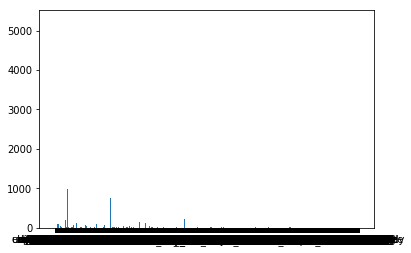

In [94]:
# Plotting word frequencies
plt.bar(range(len(wn_dict)), list(wn_dict.values()), align='center')
plt.xticks(range(len(wn_dict)), list(wn_dict.keys()))
plt.show()

In [127]:
wn_dict_copy = wn_dict.copy()

In [128]:
# Number of words for which frequency is less than num are chucked out
# [Selected 4 since it give the size that matches with paper]
num = 4
c = 0
for w, n in wn_dict_copy.items():
    if n < num:
        del wn_dict[w]
        c += 1

print(c)
print(len(wn_dict.keys()))

33466
21882


In [136]:
wn_unique_words = list(wn_dict.keys())

In [137]:
len(wn_unique_words)

21882

In [138]:
wn_gloss_matrix = bsr_matrix((len(wn_unique_words), len(wn_unique_words)), dtype=np.int8).toarray()
r = 0
for w in wn_unique_words:
    wn_words_around = []
    indices = [i for i, x in enumerate(wn_filtered_words) if x == w]
    for i in indices:
        wn_words_around.extend(wn_filtered_words[i - num_pos : i])
        wn_words_around.extend(wn_filtered_words[i + 1 : i + num_pos + 1])
    
    for word in wn_words_around:
        if word in wn_unique_words:
            index = wn_unique_words.index(word)
            wn_gloss_matrix[r][index] += 1
    
    r += 1

In [146]:
np.save('~home/tmp/gloss_matrix.npz', wn_gloss_matrix)

In [149]:
wn_gloss_matrix[0]

array([36, 34,  5, ...,  0,  0,  0], dtype=int8)